In [1]:
import pandas
import numpy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import signal

# Funciones:

In [2]:
def mysarimax(Matriz,Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12)):
    mod = sm.tsa.statespace.SARIMAX(Y,
                                    order=order,
                                    trend=trend,
                                    exog=numpy.asarray(Matriz),
                                    seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [38]:
def mysarima(Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12)):
    # Fit the model
    mod = sm.tsa.statespace.SARIMAX(Y,order=order,trend=trend,seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [4]:
def mysarimax2(Matriz,Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12),restriccion={}):
    mod = sm.tsa.statespace.SARIMAX(Y,
                                    order=order,
                                    trend=trend,
                                    exog=numpy.asarray(Matriz),
                                    seasonal_order=seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    res = mod.fit_constrained(restriccion)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [5]:
def mysarima2(Y,order=(0,0,0),trend='c',restriccion={},seasonal_order=(0,0,0,12)):
    # Fit the model
    mod = sm.tsa.statespace.SARIMAX(Y,order=order,trend=trend,
                                    enforce_invertibility=False,
                                    seasonal_order=seasonal_order)
    res = mod.fit_constrained(restriccion)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

# Ejecucion:

In [6]:
Matriz=pandas.read_csv('Pichilemu.csv',sep='|')
Matriz

Unnamed: 0              momento  rrInst  rr6Horas  rr24Horas    hr  \
0                 0  2018-01-10 02:31:00     0.0       0.0        0.0  92.6   
1                 1  2018-01-10 02:32:00     0.0       0.0        0.0  92.5   
2                 2  2018-01-10 02:33:00     0.0       0.0        0.0  92.6   
3                 3  2018-01-10 02:34:00     0.0       0.0        0.0  92.5   
4                 4  2018-01-10 02:35:00     0.0       0.0        0.0  92.5   
...             ...                  ...     ...       ...        ...   ...   
1034028     1034574  2019-12-31 23:56:00     0.0       0.0        0.0  84.9   
1034029     1034575  2019-12-31 23:57:00     0.0       0.0        0.0  85.0   
1034030     1034576  2019-12-31 23:58:00     0.0       0.0        0.0  85.0   
1034031     1034577  2019-12-31 23:59:00     0.0       0.0        0.0  84.9   
1034032     1034578  2020-01-01 00:00:00     0.0       0.0        0.0  84.9   

             p0    qfe1     qff     qnh  ...    td  tMin12Horas  tMax12Horas  \
0        1010.4  1010.5  1014.1  1014.1  ...  13.6         15.5         16.6   
1        1010.4  1010.5  1014.1  1014.1  ...  13.6         15.5         16.6   
2        1010.3  1010.5  1014.1  1014.1  ...  13.6         15.5         16.6   
3        1010.3  1010.4  1014.0  1014.0  ...  13.6         15.5         16.6   
4        1010.4  1010.4  1014.0  1014.0  ...  13.6         15.5         16.6   
...         ...     ...     ...     ...  ...   ...          ...          ...   
1034028  1009.5  1009.7  1013.3  1013.3  ...  12.9         10.9         15.0   
1034029  1009.5  1009.6  1013.2  1013.2  ...  13.0         10.9         15.0   
1034030  1009.5  1009.7  1013.3  1013.3  ...  12.9         10.9         15.0   
1034031  1009.5  1009.7  1013.3  1013.3  ...  12.8         10.9         15.0   
1034032  1009.5  1009.7  1013.3  1013.3  ...  12.9         12.6         17.2   

         Anno  Mes  Dia  Hora  Minuto  Hora_Min_t  Hora_Max_t  
0        2018    1   10     2      31          23          22  
1        2018    1   10     2      32          23          22  
2        2018    1   10     2      33          23          22  
3        2018    1   10     2      34          23          22  
4        2018    1   10     2      35          23          22  
...       ...  ...  ...   ...     ...         ...         ...  
1034028  2019   12   31    23      56           9           0  
1034029  2019   12   31    23      57           9           0  
1034030  2019   12   31    23      58           9           0  
1034031  2019   12   31    23      59           9           0  
1034032  2020    1    1     0       0          12          21  

[1034033 rows x 29 columns]

In [7]:
Matriz_Resultados=Matriz.loc[:,'ts']

In [8]:
Matriz_Informacion_general=Matriz.loc[:,['rr6Horas','rr24Horas','radiacionGlobalAcumulada24Horas',
                                  'tMin12Horas','tMax12Horas','Mes','Hora','Hora_Min_t','Hora_Max_t']]

In [9]:
Intervalo=45#cada cuantos minutos consideramos valor

In [10]:
Matriz_Informacion_general=Matriz_Informacion_general.loc[range(0,len(Matriz_Resultados),Intervalo),:].reset_index().drop('index',axis=1)
Matriz_Resultados=Matriz_Resultados.loc[range(0,len(Matriz_Resultados),Intervalo)].reset_index().drop('index',axis=1)

In [11]:
IG=pandas.DataFrame()
for k in range(1,24):
    IG['H'+str(k)]=1*(Matriz_Informacion_general['Hora']==k)
for k in range(1,12):
    IG['M'+str(k)]=1*(Matriz_Informacion_general['Mes']==k)
IG['Constante']=1*(True)
IG['rr6Horas']=1*(Matriz_Informacion_general['rr6Horas'])
IG['rr24Horas']=1*(Matriz_Informacion_general['rr24Horas'])
IG['radiacionGlobalAcumulada24Horas']=1*(Matriz_Informacion_general['radiacionGlobalAcumulada24Horas'])
IG['tMin12Horas']=1*(Matriz_Informacion_general['tMin12Horas'])
IG['tMax12Horas']=1*(Matriz_Informacion_general['tMax12Horas'])
IG['Hora_Min_t']=1*(Matriz_Informacion_general['Hora_Min_t'])
IG['Hora_Max_t']=1*(Matriz_Informacion_general['Hora_Max_t'])

In [12]:
IG

H1  H2  H3  H4  H5  H6  H7  H8  H9  H10  ...  M10  M11  Constante  \
0       0   1   0   0   0   0   0   0   0    0  ...    0    0          1   
1       0   0   1   0   0   0   0   0   0    0  ...    0    0          1   
2       0   0   0   1   0   0   0   0   0    0  ...    0    0          1   
3       0   0   0   1   0   0   0   0   0    0  ...    0    0          1   
4       0   0   0   0   1   0   0   0   0    0  ...    0    0          1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...        ...   
22974   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22975   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22976   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22977   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   
22978   0   0   0   0   0   0   0   0   0    0  ...    0    0          1   

       rr6Horas  rr24Horas  radiacionGlobalAcumulada24Horas  tMin12Horas  \
0           0.0        0.0                              6.7         15.5   
1           0.0        0.0                              6.7         15.5   
2           0.0        0.0                              6.7         15.5   
3           0.0        0.0                              6.7         15.5   
4           0.0        0.0                              6.7         15.5   
...         ...        ...                              ...          ...   
22974       0.0        0.0                            693.7         10.9   
22975       0.0        0.0                            693.7         10.9   
22976       0.0        0.0                            693.7         10.9   
22977       0.0        0.0                            693.7         10.9   
22978       0.0        0.0                            693.7         10.9   

       tMax12Horas  Hora_Min_t  Hora_Max_t  
0             16.6          23          22  
1             16.6          23          22  
2             16.6          23          22  
3             16.6          23          22  
4             16.6          23          22  
...            ...         ...         ...  
22974         15.0           9           0  
22975         15.0           9           0  
22976         15.0           9           0  
22977         15.0           9           0  
22978         15.0           9           0  

[22979 rows x 42 columns]

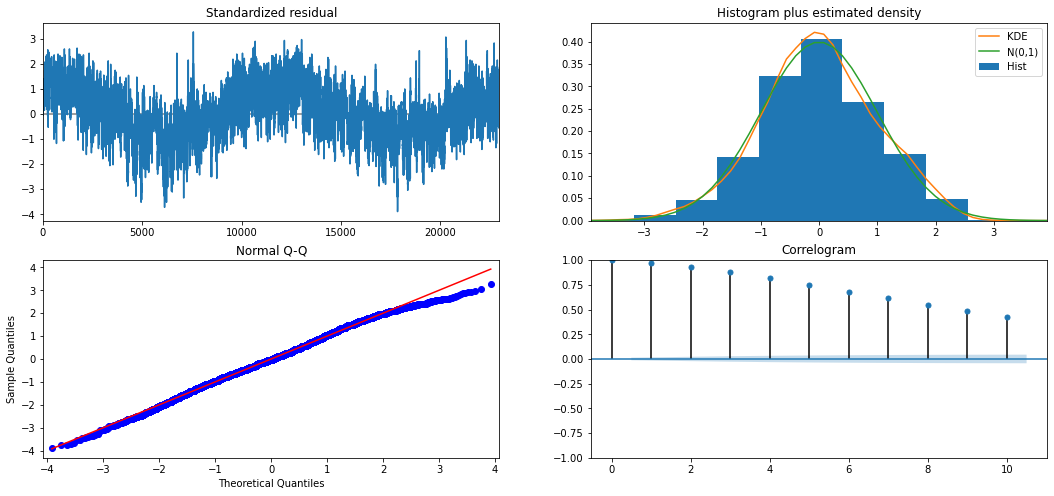

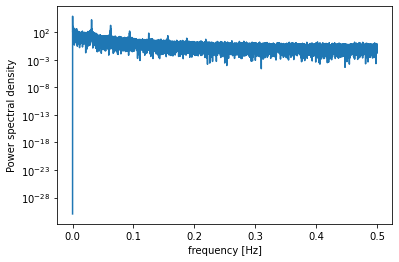

          freq           pow         delay
2     0.000087  81103.197518  11489.500000
718   0.031246  18108.252580     32.004178
717   0.031202  10181.937962     32.048815
719   0.031289   9738.222420     31.959666
720   0.031333   5946.059958     31.915278
716   0.031159   2984.944820     32.093575
721   0.031376   2569.587370     31.871012
1436  0.062492   1798.181302     16.002089
712   0.030985   1292.963670     32.273876
17    0.000740   1123.200422   1351.705882
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:                        SARIMAX   Log Likelihood              -57432.352
Date:                Thu, 06 Aug 2020   AIC                         114868.704
Time:                        18:52:27   BIC                         114884.789
Sample:                             0   HQIC                        114873.932
                              - 22979                

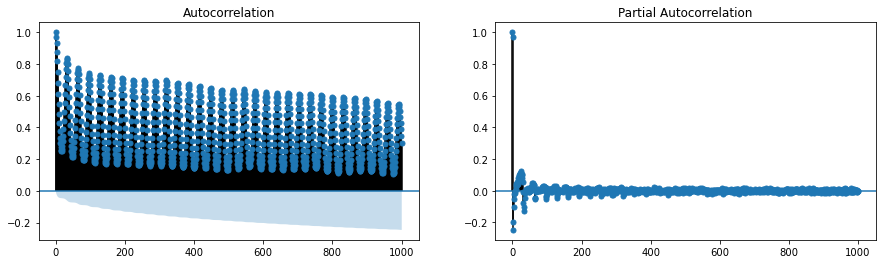

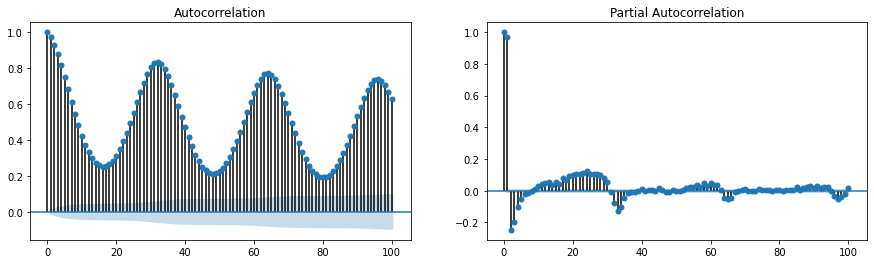

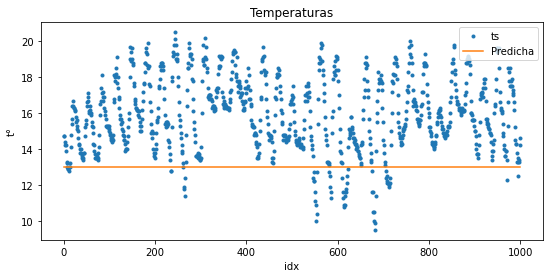

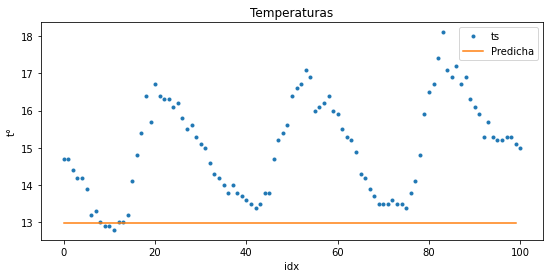

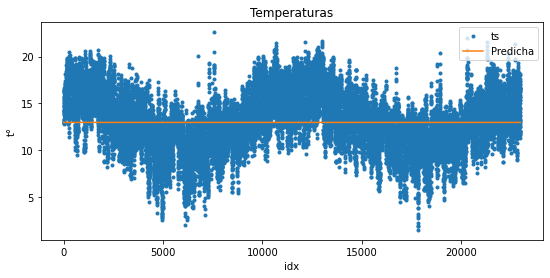

In [13]:
mysarima(Y=Matriz_Resultados)

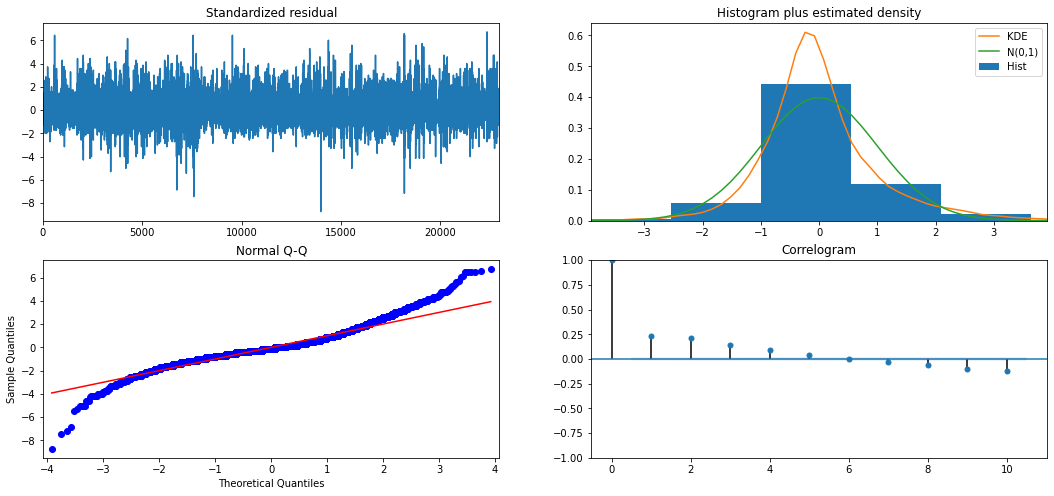

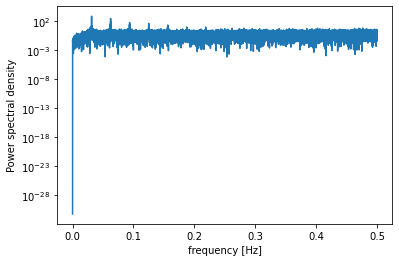

          freq         pow      delay
718   0.031246  688.107137  32.004178
717   0.031202  393.248063  32.048815
719   0.031289  370.858394  31.959666
1436  0.062492  278.535706  16.002089
720   0.031333  225.324649  31.915278
1438  0.062579  153.100672  15.979833
716   0.031159  111.056978  32.093575
721   0.031376  100.633263  31.871012
1439  0.062622   72.705729  15.968728
2154  0.093738   54.146480  10.668059
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -24381.047
Date:                Thu, 06 Aug 2020   AIC                          48766.094
Time:                        18:52:59   BIC                          48782.179
Sample:                             0   HQIC                         48771.322
                              - 22979                                         
Covariance Type:             

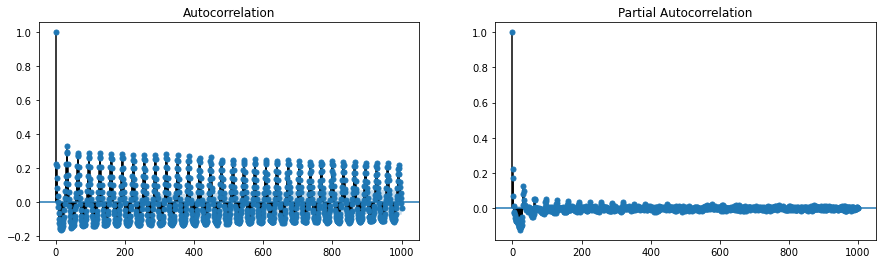

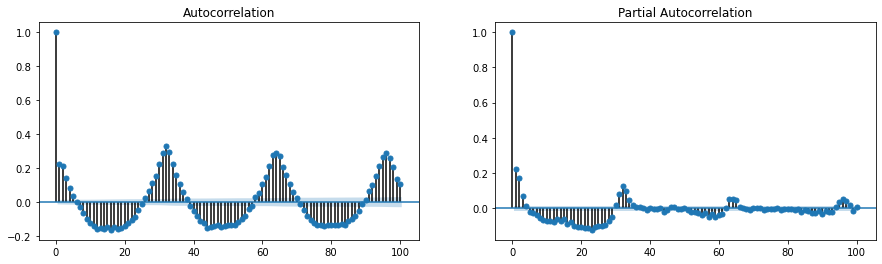

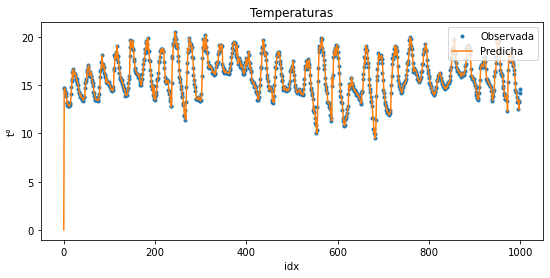

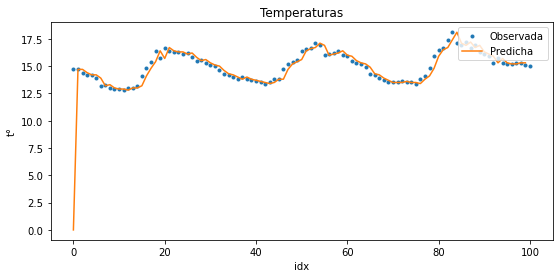

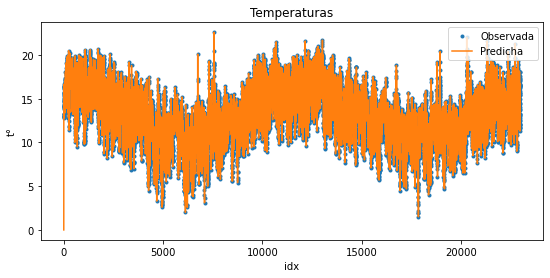

In [14]:
mysarima(Y=Matriz_Resultados['ts'],order=(0,1,0))

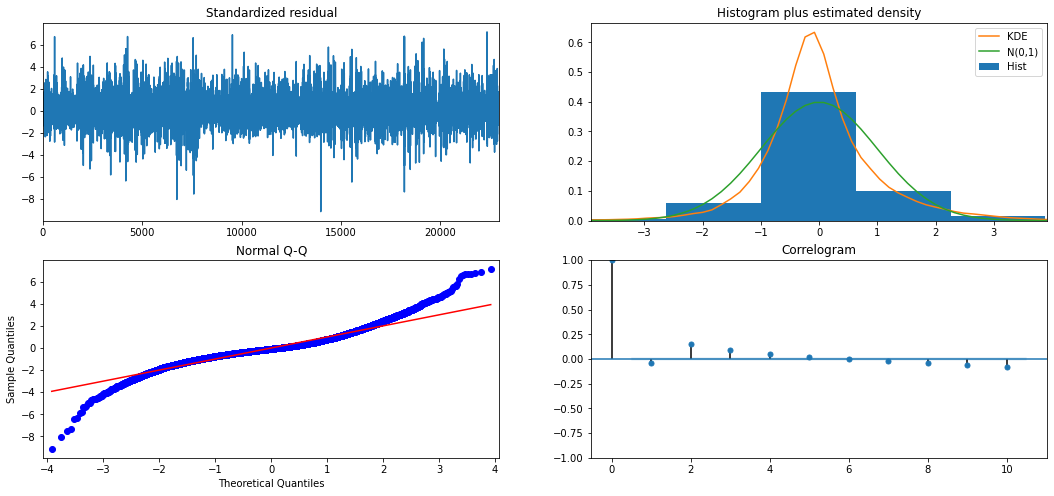

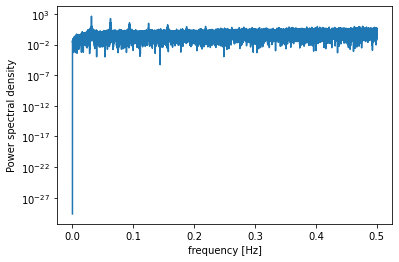

          freq         pow      delay
718   0.031246  413.940075  32.004178
717   0.031202  237.917444  32.048815
719   0.031289  222.949530  31.959666
1436  0.062492  175.939292  16.002089
720   0.031333  135.311729  31.915278
1438  0.062579   96.510712  15.979833
716   0.031159   66.513122  32.093575
721   0.031376   61.000442  31.871012
1439  0.062622   46.024304  15.968728
2154  0.093738   36.197995  10.668059
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -23762.480
Date:                Thu, 06 Aug 2020   AIC                          47530.959
Time:                        18:53:29   BIC                          47555.086
Sample:                             0   HQIC                         47538.800
                              - 22979                                         
Covariance Type:             

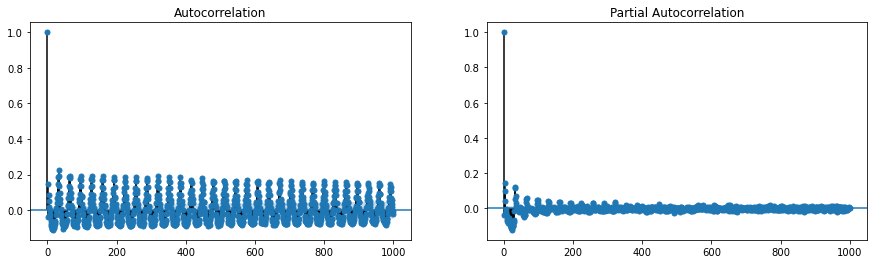

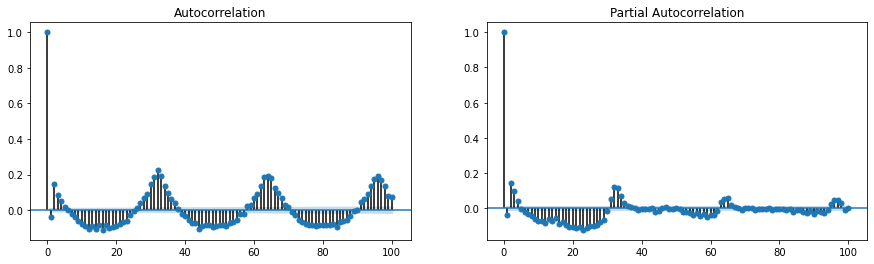

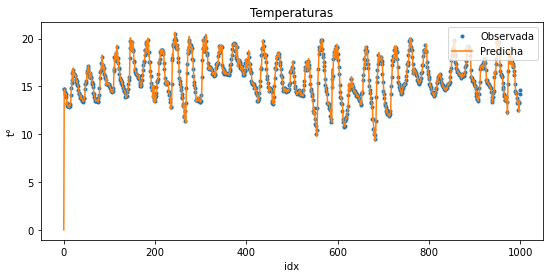

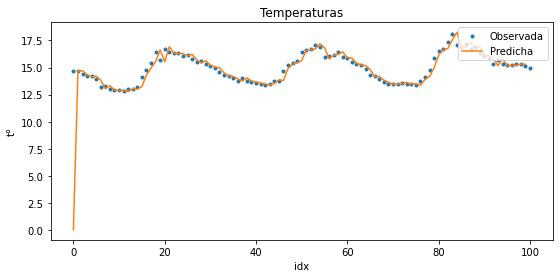

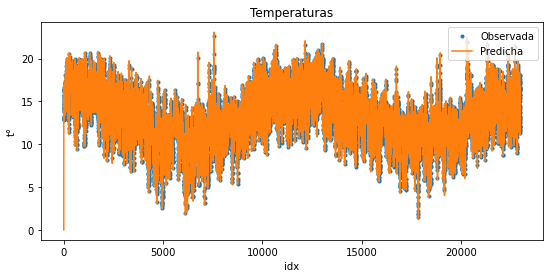

In [15]:
mysarima(Y=Matriz_Resultados['ts'],order=(1,1,0))

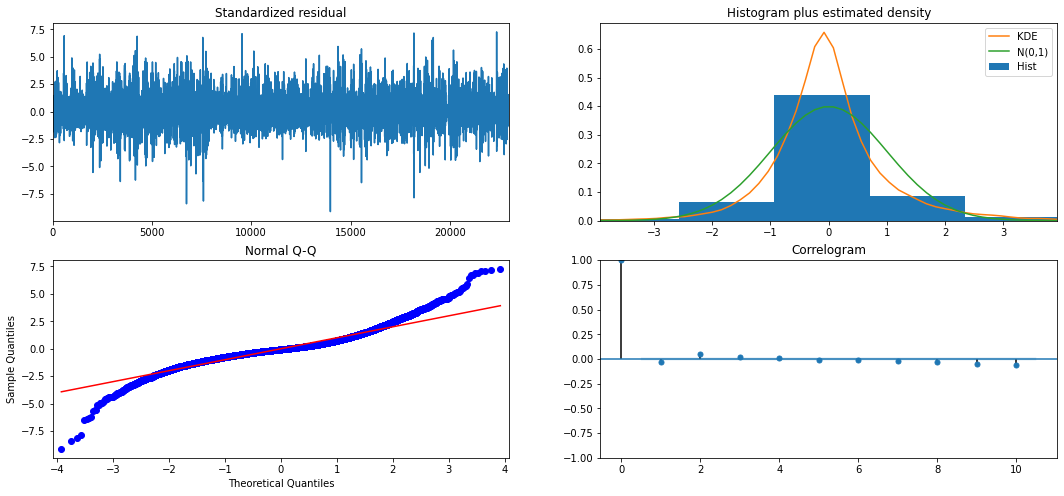

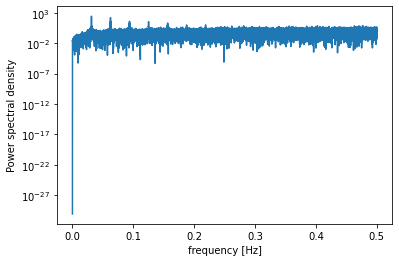

          freq         pow      delay
718   0.031246  285.952120  32.004178
717   0.031202  165.476410  32.048815
1436  0.062492  164.605231  16.002089
719   0.031289  153.750717  31.959666
720   0.031333   93.500988  31.915278
1438  0.062579   90.931778  15.979833
716   0.031159   45.701191  32.093575
1439  0.062622   42.987841  15.968728
721   0.031376   42.679457  31.871012
2154  0.093738   41.752472  10.668059
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -23423.566
Date:                Thu, 06 Aug 2020   AIC                          46855.133
Time:                        18:56:28   BIC                          46887.302
Sample:                             0   HQIC                         46865.587
                              - 22979                                         
Covariance Type:             

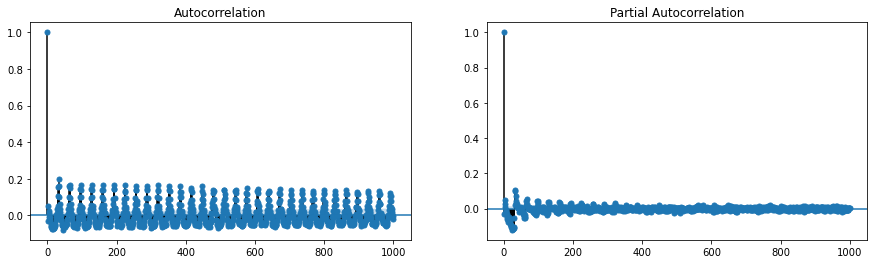

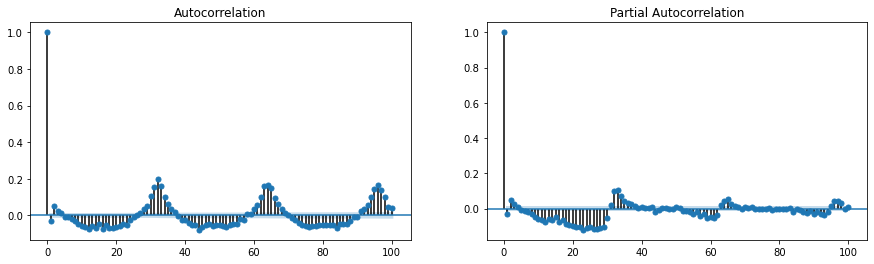

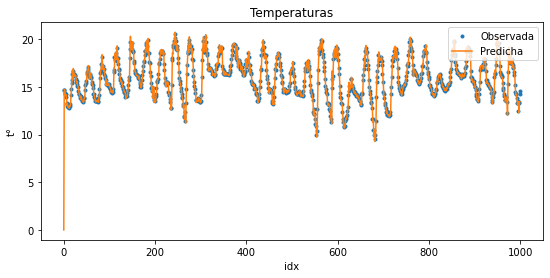

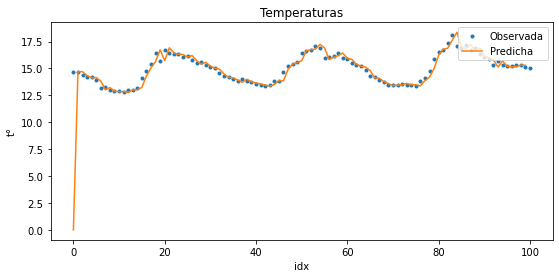

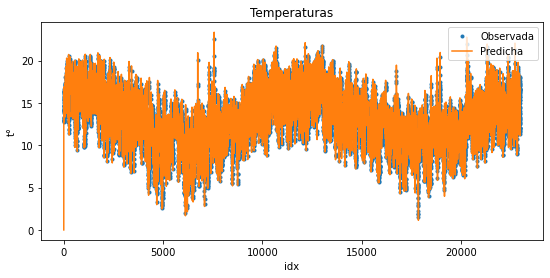

In [18]:
mysarima(Y=Matriz_Resultados['ts'],order=(1,1,1))

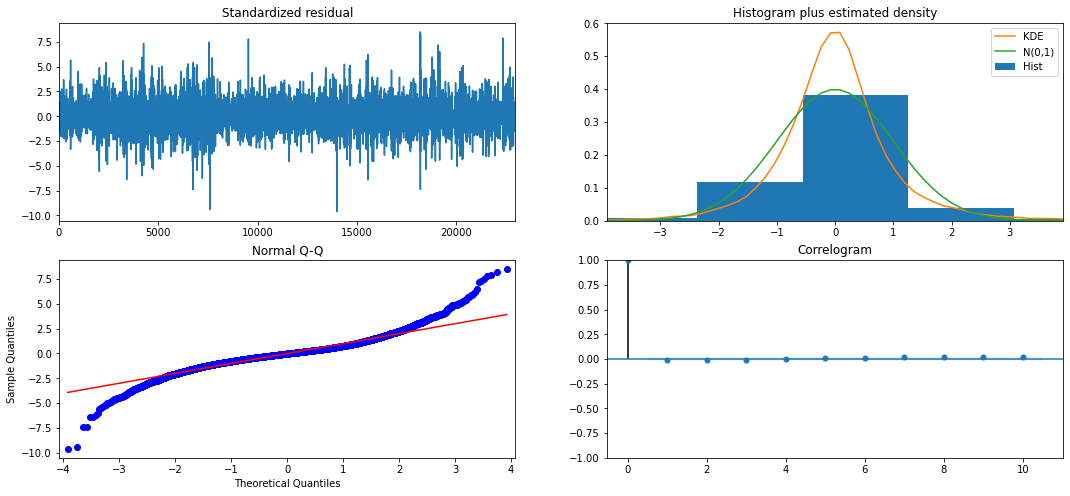

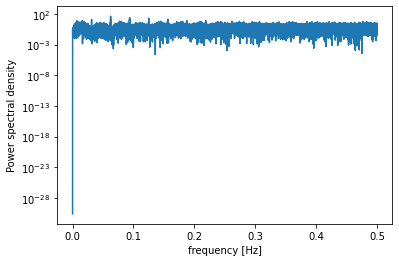

          freq        pow      delay
1436  0.062492  40.700368  16.002089
2154  0.093738  22.785477  10.668059
1438  0.062579  21.293153  15.979833
2875  0.125114  19.361970   7.992696
2873  0.125027  14.357687   7.998260
3594  0.156404  13.303135   6.393712
2157  0.093868  12.961158  10.653222
718   0.031246  12.377930  32.004178
2151  0.093607  11.855477  10.682938
1439  0.062622  10.862324  15.968728
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:              SARIMAX(32, 1, 0)   Log Likelihood              -20941.886
Date:                Thu, 06 Aug 2020   AIC                          41951.772
Time:                        19:06:43   BIC                          42225.210
Sample:                             0   HQIC                         42040.635
                              - 22979                                         
Covariance Type:                  opg   

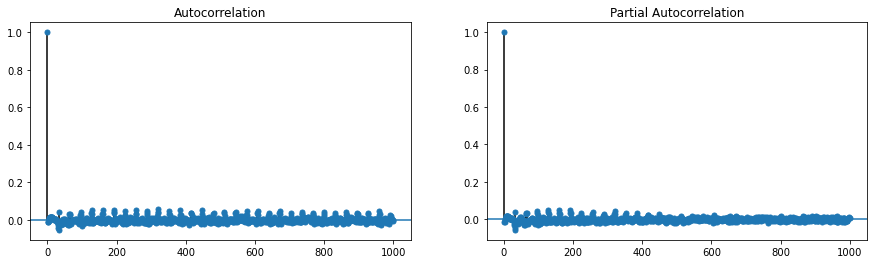

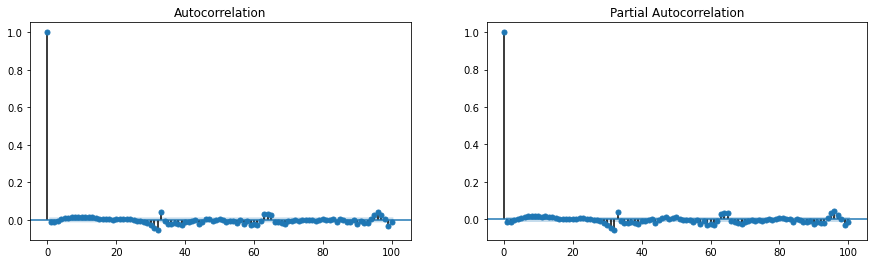

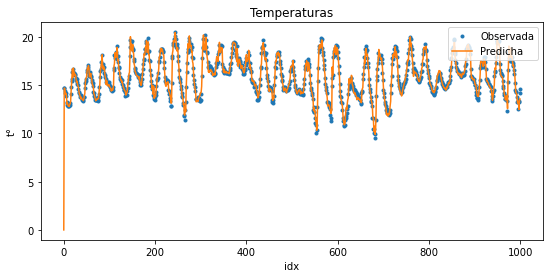

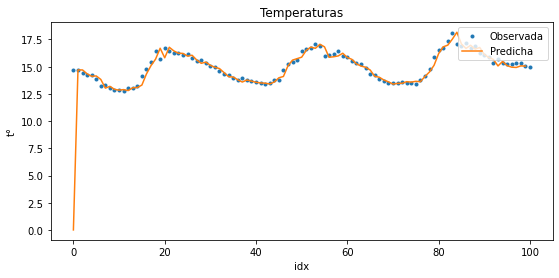

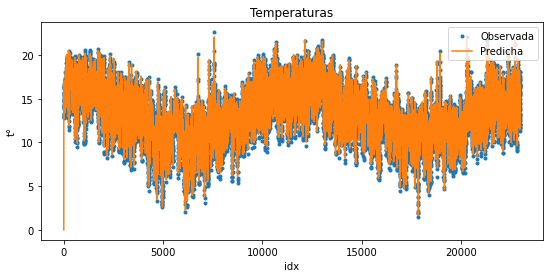

In [20]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


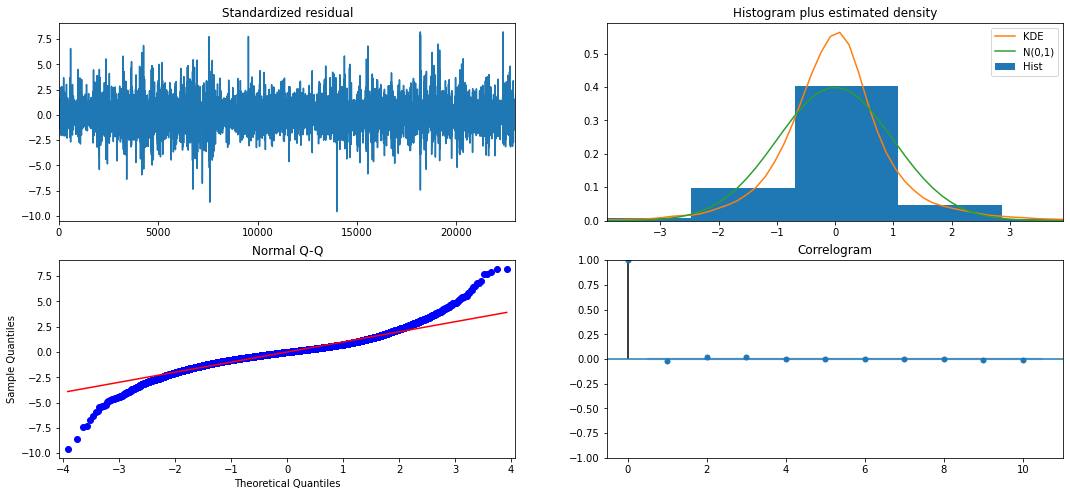

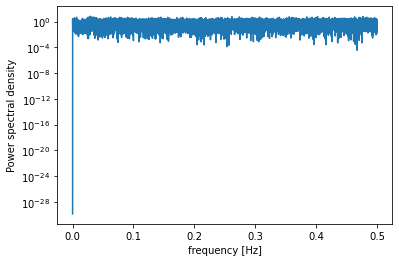

           freq       pow      delay
666    0.028983  6.849115  34.503003
10952  0.476609  6.326105   2.098156
9246   0.402367  6.132810   2.485291
6013   0.261674  5.758456   3.821553
653    0.028417  5.591280  35.189893
8179   0.355934  5.502434   2.809512
10645  0.463249  5.409358   2.158666
8843   0.384830  5.376348   2.598553
6298   0.274076  5.362806   3.648619
1436   0.062492  5.334625  16.002089
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                22979
Model:             SARIMAX(32, 1, 0)x(0, 0, [1], 32)   Log Likelihood              -20334.276
Date:                               Thu, 06 Aug 2020   AIC                          40738.552
Time:                                       22:58:34   BIC                          41020.033
Sample:                                            0   HQIC                         40830.029
                             

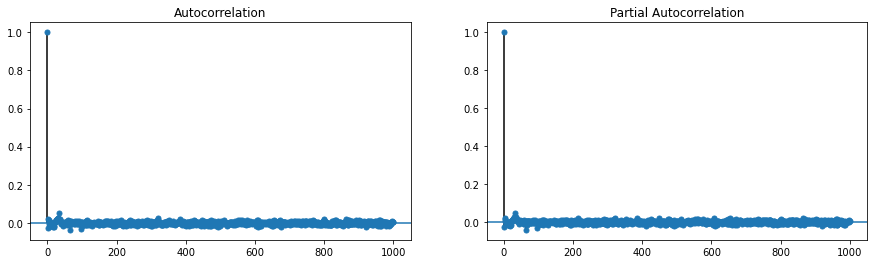

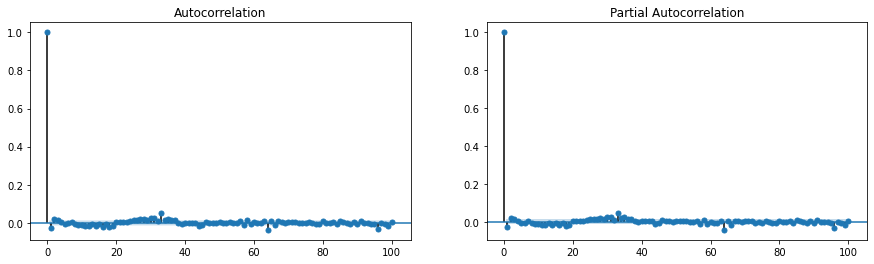

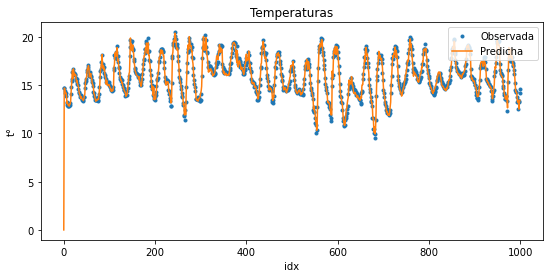

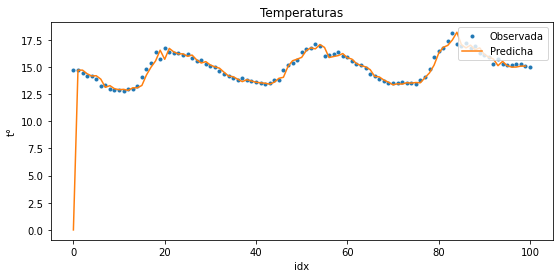

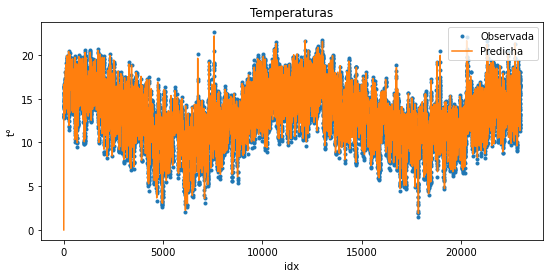

In [30]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


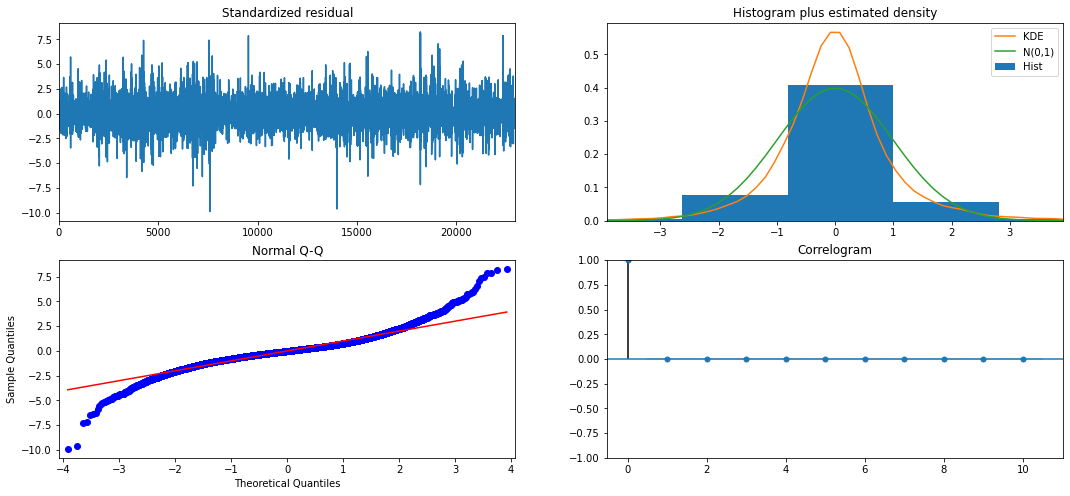

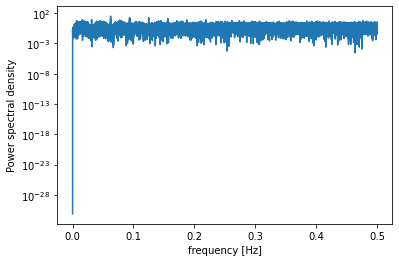

          freq        pow      delay
1436  0.062492  31.317019  16.002089
2154  0.093738  19.316307  10.668059
2875  0.125114  17.677371   7.992696
1438  0.062579  16.478626  15.979833
3594  0.156404  13.144561   6.393712
2873  0.125027  13.101514   7.998260
2157  0.093868  11.241228  10.653222
3593  0.156360  10.082406   6.395491
2151  0.093607  10.006763  10.682938
2874  0.125071   9.187542   7.995477
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:              SARIMAX(32, 1, 1)   Log Likelihood              -20816.401
Date:                Thu, 06 Aug 2020   AIC                          41702.803
Time:                        23:55:49   BIC                          41984.283
Sample:                             0   HQIC                         41794.279
                              - 22979                                         
Covariance Type:                  opg   

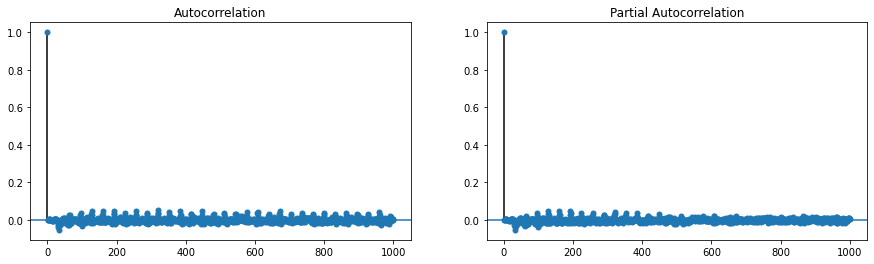

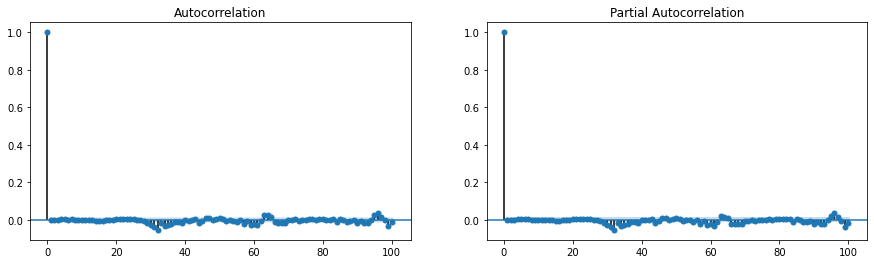

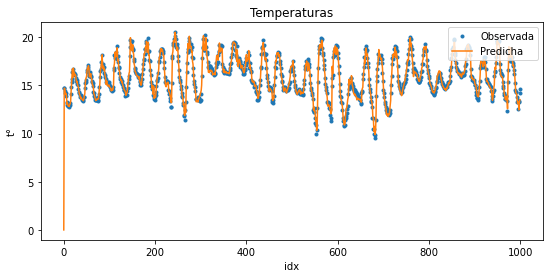

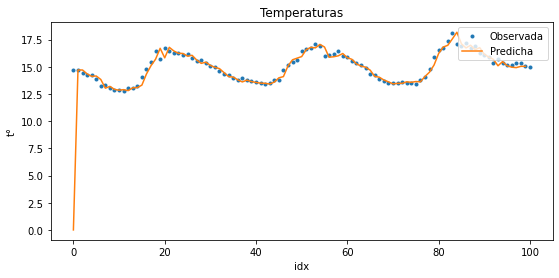

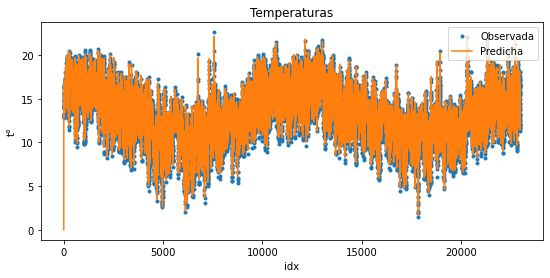

In [32]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,1))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


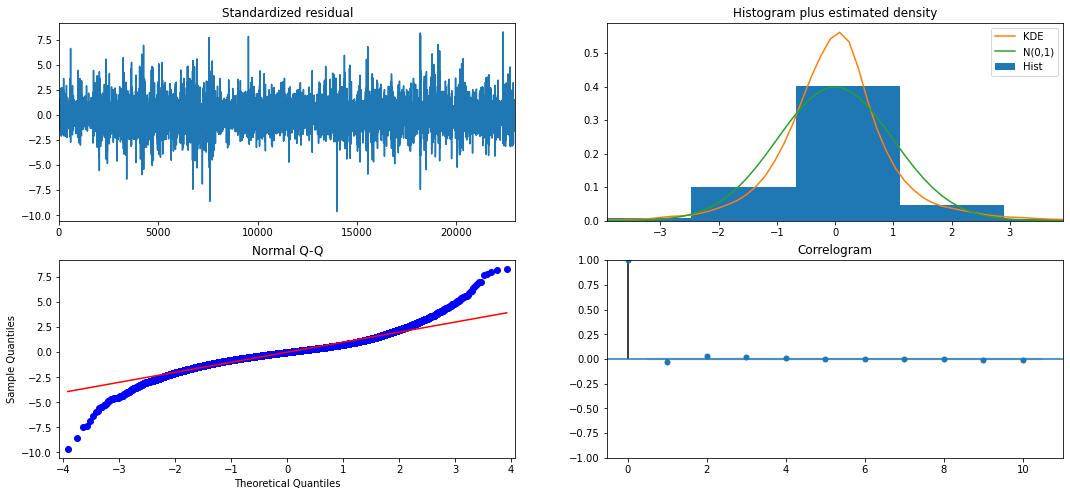

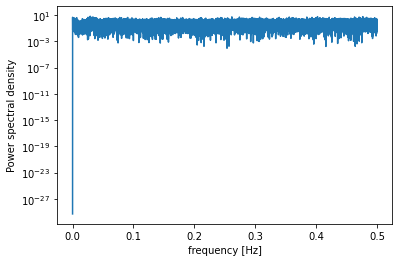

           freq       pow      delay
666    0.028983  7.037439  34.503003
10952  0.476609  6.169981   2.098156
9246   0.402367  6.148022   2.485291
6013   0.261674  5.625302   3.821553
653    0.028417  5.585082  35.189893
10645  0.463249  5.444926   2.158666
8179   0.355934  5.373580   2.809512
6298   0.274076  5.279113   3.648619
8843   0.384830  5.262644   2.598553
10817  0.470734  5.252590   2.124341
                                        SARIMAX Results                                         
Dep. Variable:                                       ts   No. Observations:                22979
Model:             SARIMAX(32, 1, 0)x(0, 0, [1, 2], 16)   Log Likelihood              -20292.194
Date:                                  Fri, 07 Aug 2020   AIC                          40656.387
Time:                                          06:22:00   BIC                          40945.910
Sample:                                               0   HQIC                         40750.477
           

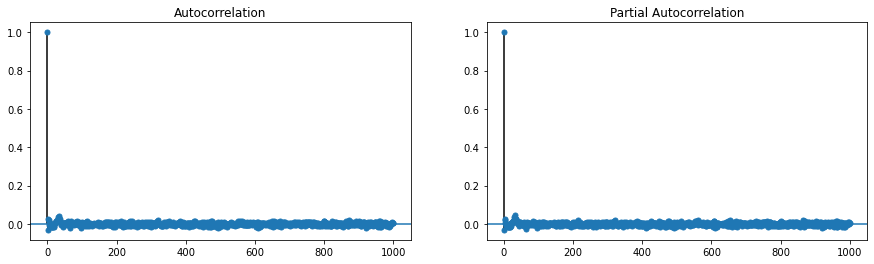

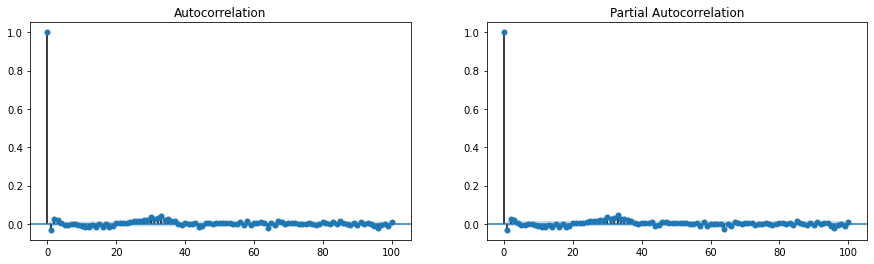

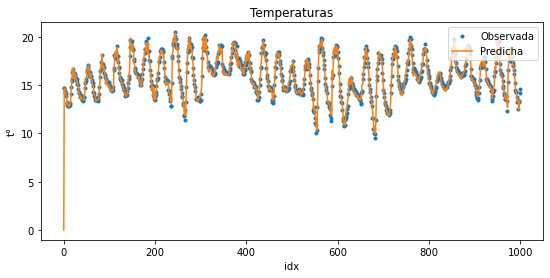

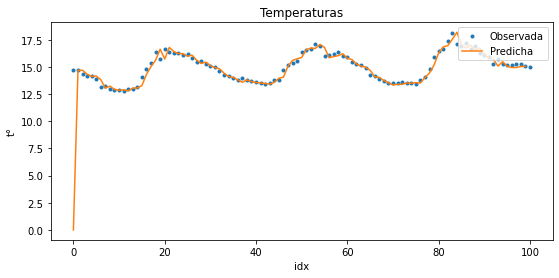

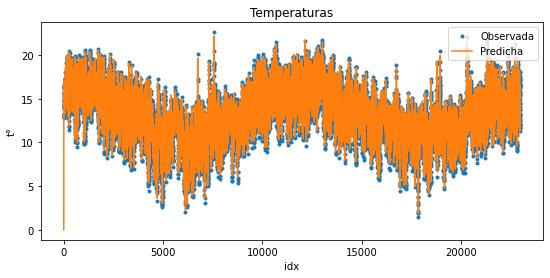

In [36]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         seasonal_order=(0,0,2,60*12/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


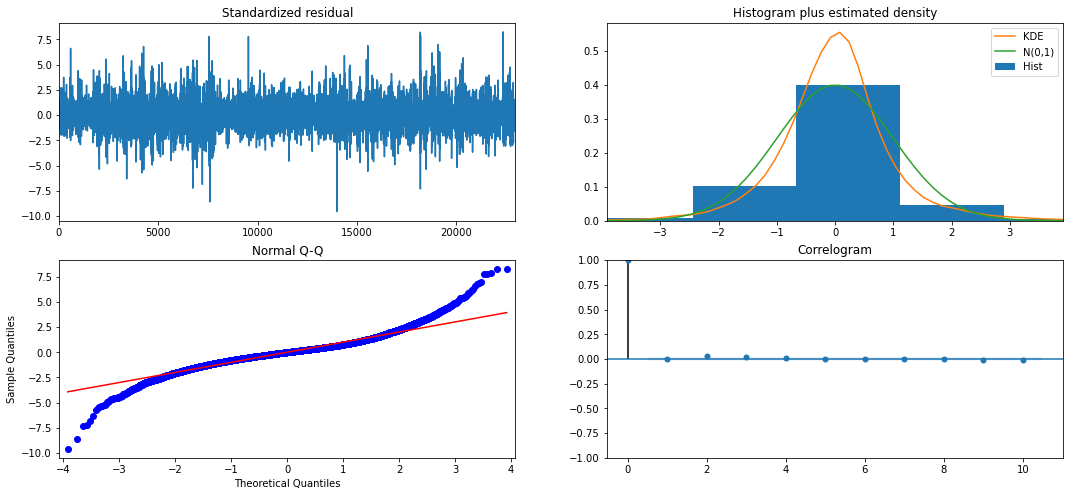

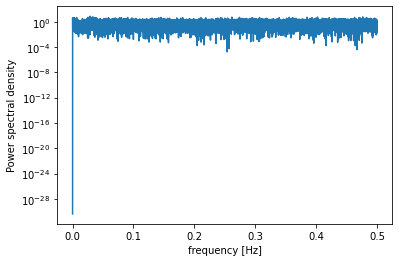

           freq       pow      delay
666    0.028983  7.717132  34.503003
653    0.028417  6.193779  35.189893
10952  0.476609  6.032247   2.098156
9246   0.402367  5.708308   2.485291
736    0.032029  5.590955  31.221467
6013   0.261674  5.583640   3.821553
773    0.033639  5.580969  29.727038
8179   0.355934  5.342931   2.809512
585    0.025458  5.283038  39.280342
8843   0.384830  5.182331   2.598553
                                        SARIMAX Results                                         
Dep. Variable:                                       ts   No. Observations:                22979
Model:             SARIMAX(32, 1, 1)x(0, 0, [1, 2], 16)   Log Likelihood              -20307.673
Date:                                  Fri, 07 Aug 2020   AIC                          40689.345
Time:                                          11:29:49   BIC                          40986.910
Sample:                                               0   HQIC                         40786.049
           

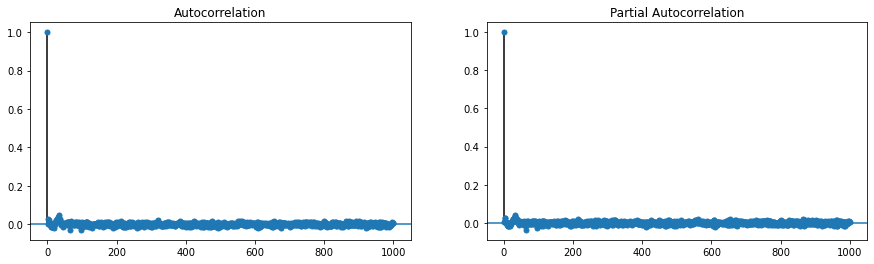

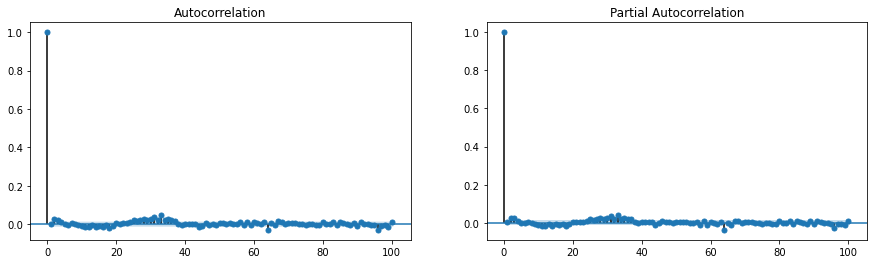

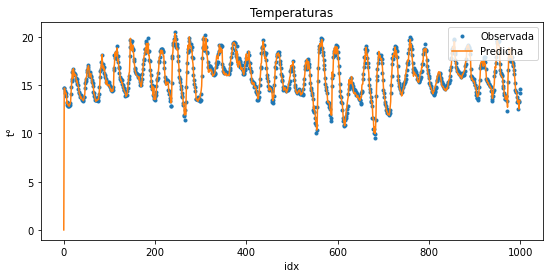

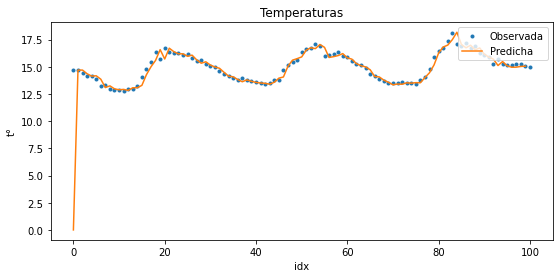

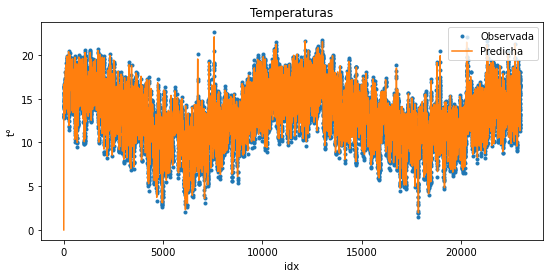

In [39]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,1),
         seasonal_order=(0,0,2,60*12/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


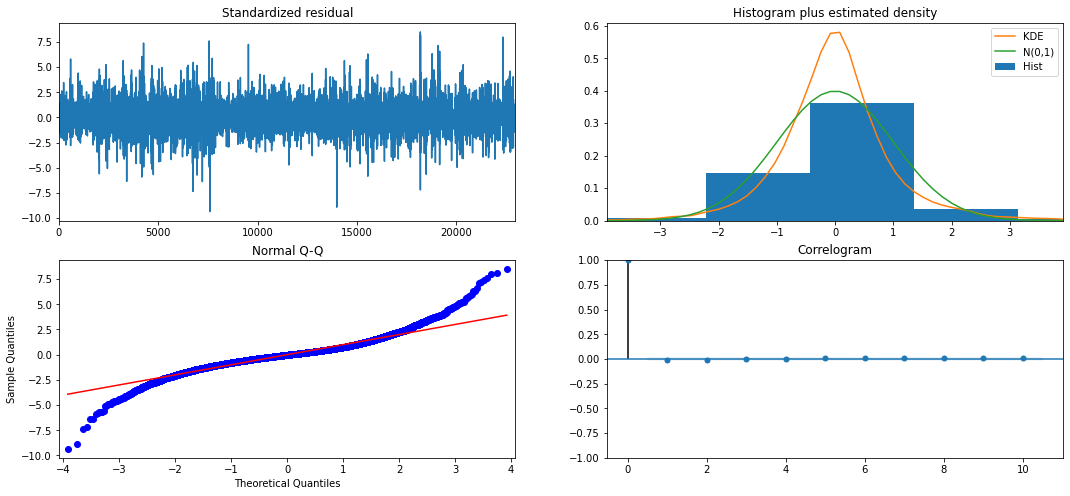

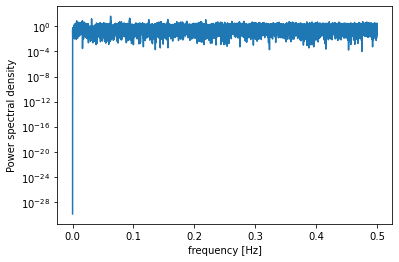

          freq        pow      delay
1436  0.062492  41.324969  16.002089
2154  0.093738  19.896844  10.668059
718   0.031246  16.042313  32.004178
2157  0.093868  15.327076  10.653222
1438  0.062579  14.498078  15.979833
3594  0.156404  12.740790   6.393712
3593  0.156360  11.870127   6.395491
2875  0.125114  11.497973   7.992696
5025  0.218678  11.386073   4.572935
2151  0.093607   9.331371  10.682938
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:              SARIMAX(32, 1, 0)   Log Likelihood              -20765.363
Date:                Fri, 07 Aug 2020   AIC                          41644.725
Time:                        13:23:09   BIC                          42103.136
Sample:                             0   HQIC                         41793.701
                              - 22979                                         
Covariance Type:                  opg   

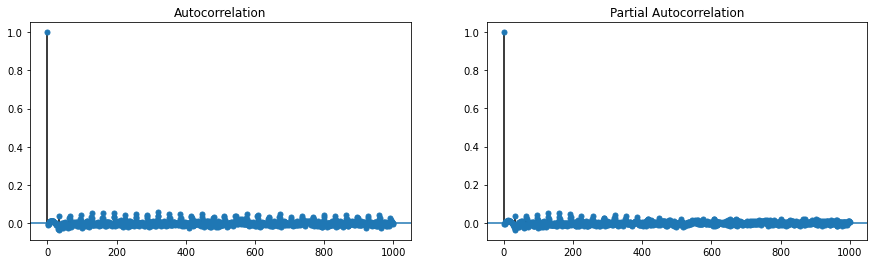

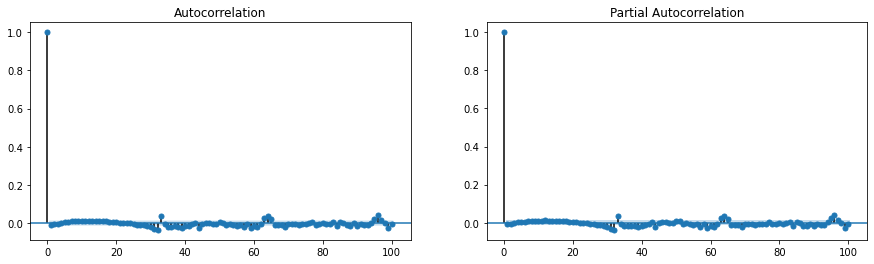

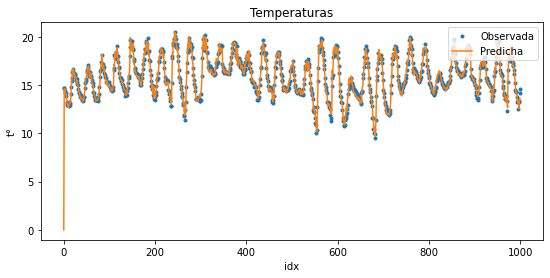

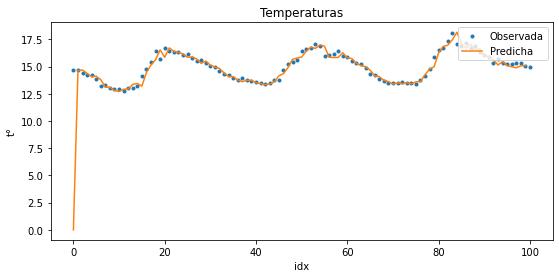

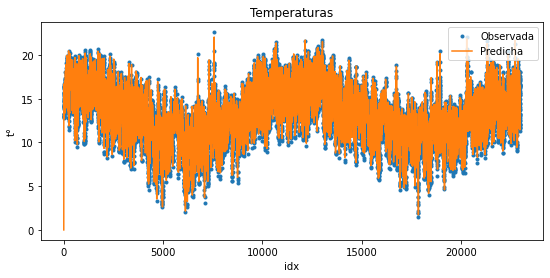

In [43]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                          'H9','H10','H11','H12','H13','H14','H15',
                          'H16','H17','H18','H19','H20','H21','H22','H23']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


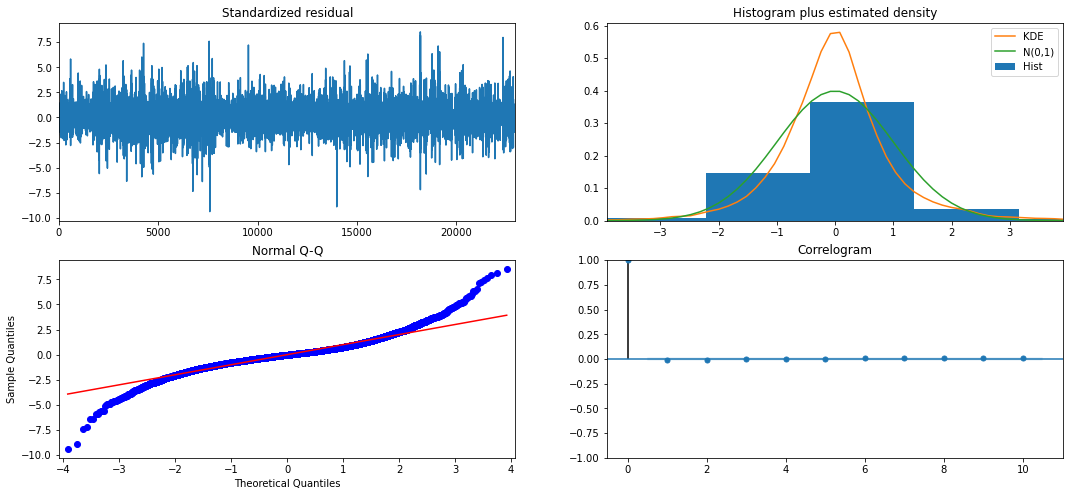

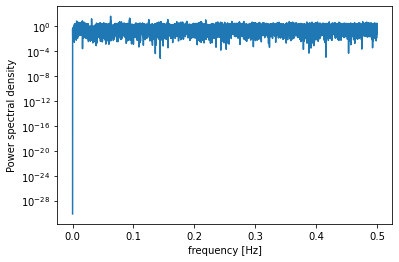

          freq        pow      delay
1436  0.062492  43.009153  16.002089
2154  0.093738  21.344889  10.668059
718   0.031246  16.506034  32.004178
2157  0.093868  15.550283  10.653222
1438  0.062579  15.233756  15.979833
3594  0.156404  12.656702   6.393712
2875  0.125114  12.583396   7.992696
3593  0.156360  11.878742   6.395491
5025  0.218678  11.137413   4.572935
2151  0.093607  10.197334  10.682938
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                22979
Model:              SARIMAX(32, 1, 0)   Log Likelihood              -20762.078
Date:                Fri, 07 Aug 2020   AIC                          41660.155
Time:                        15:38:05   BIC                          42207.031
Sample:                             0   HQIC                         41837.881
                              - 22979                                         
Covariance Type:                  opg   

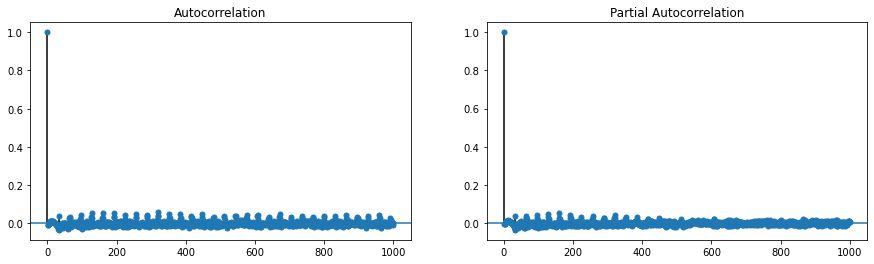

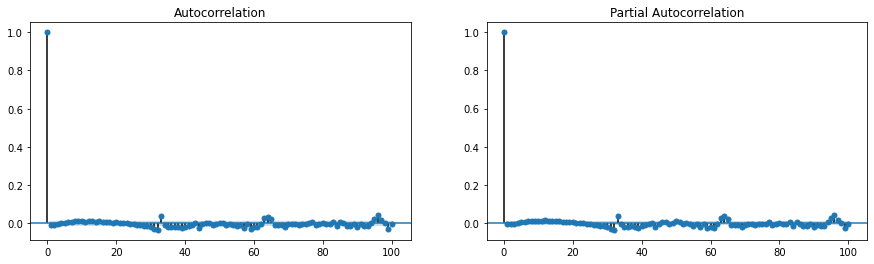

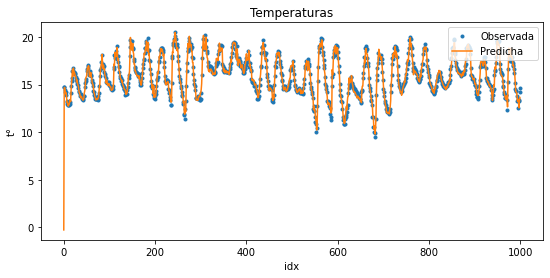

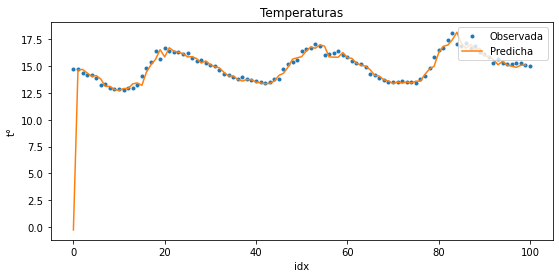

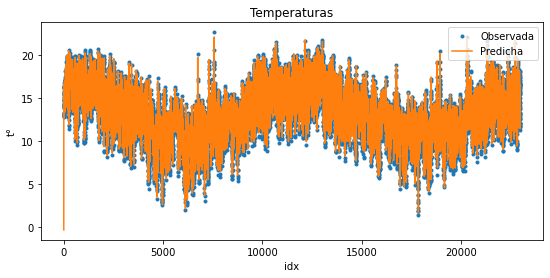

In [44]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                          'H9','H10','H11','H12','H13','H14','H15',
                          'H16','H17','H18','H19','H20','H21','H22','H23',
                          'M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

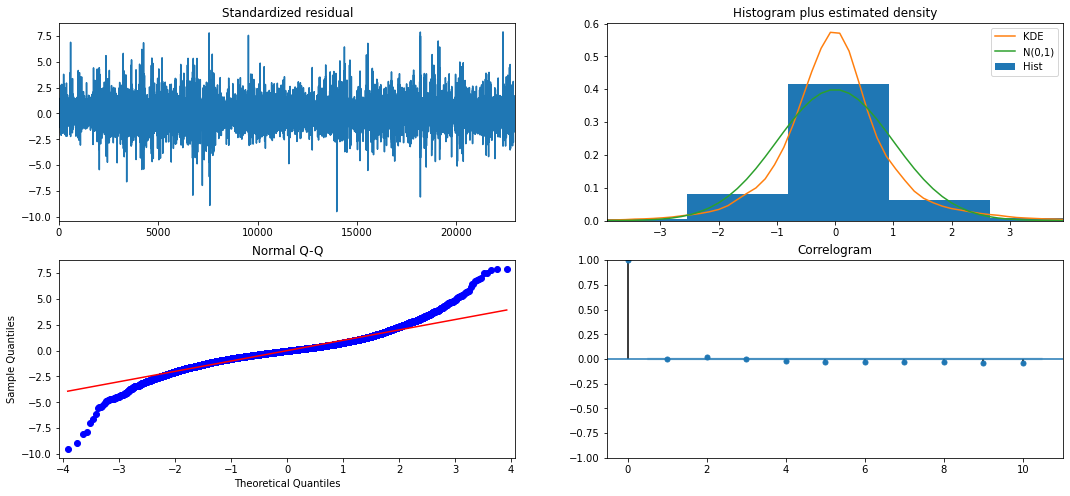

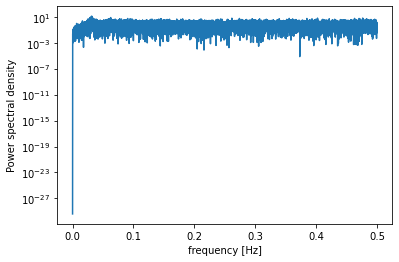

          freq        pow      delay
712   0.030985  12.288585  32.273876
736   0.032029  11.625174  31.221467
718   0.031246   9.902966  32.004178
720   0.031333   9.632973  31.915278
719   0.031289   8.819770  31.959666
717   0.031202   7.839457  32.048815
666   0.028983   7.818552  34.503003
1438  0.062579   7.656579  15.979833
716   0.031159   7.579895  32.093575
728   0.031681   7.477917  31.564560
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21047.834
Date:                              Thu, 06 Aug 2020   AIC                          42105.668
Time:                                      21:11:41   BIC                          42145.879
Sample:                                           0   HQIC                         42118.736
                                   

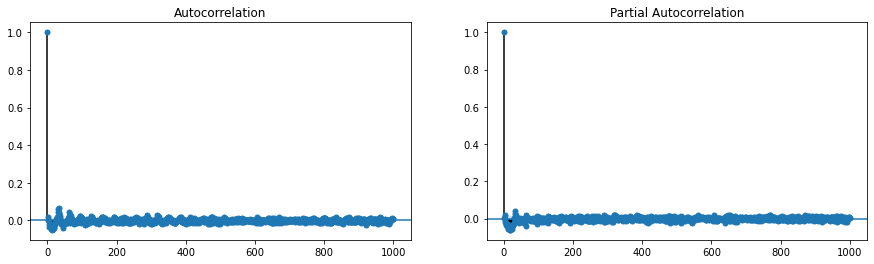

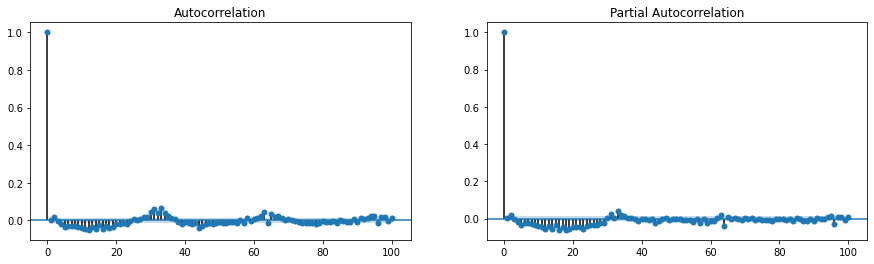

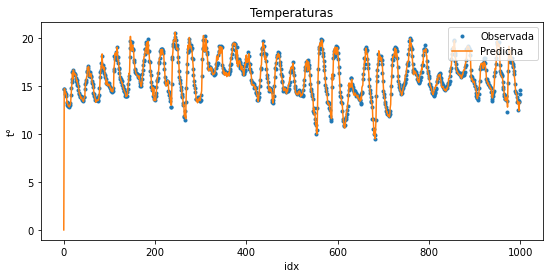

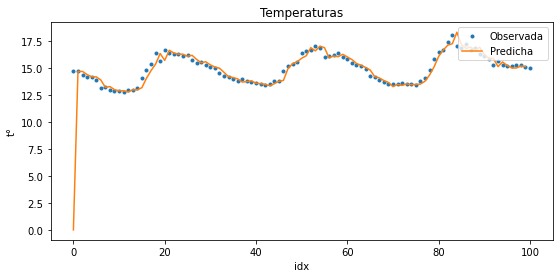

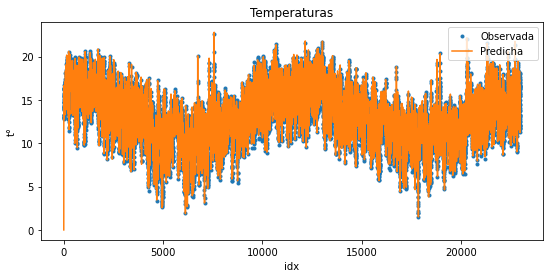

In [24]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


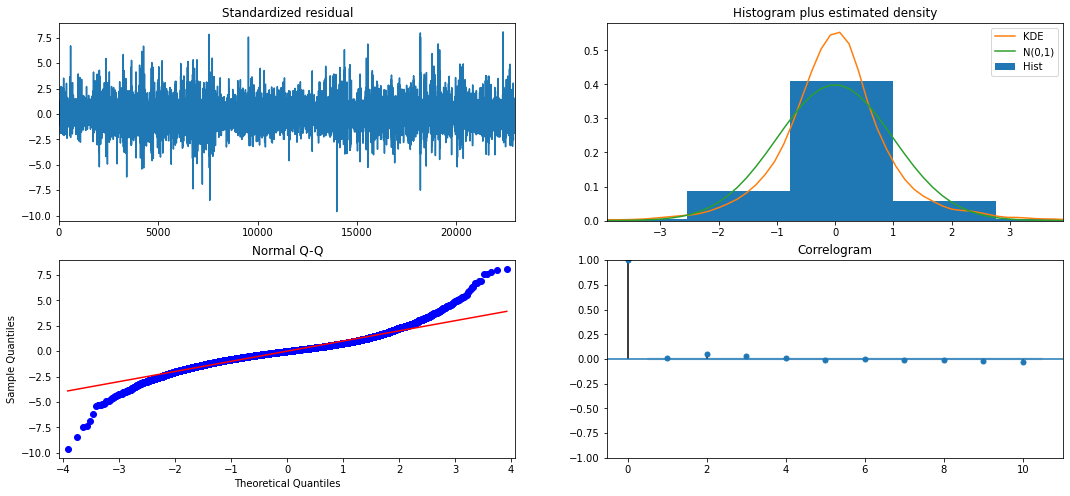

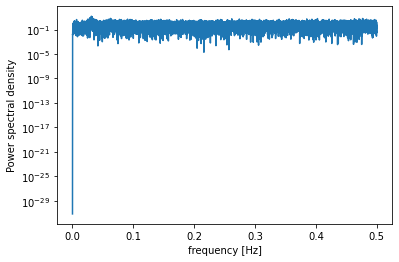

         freq        pow      delay
712  0.030985  14.889179  32.273876
736  0.032029  13.061868  31.221467
721  0.031376   9.771158  31.871012
728  0.031681   8.820865  31.564560
705  0.030680   8.648064  32.594326
666  0.028983   8.630154  34.503003
716  0.031159   8.560534  32.093575
720  0.031333   8.529328  31.915278
732  0.031855   7.551991  31.392077
653  0.028417   6.718644  35.189893
                                     SARIMAX Results                                      
Dep. Variable:                                 ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 32)   Log Likelihood              -20727.252
Date:                            Thu, 06 Aug 2020   AIC                          41466.503
Time:                                    21:20:27   BIC                          41514.757
Sample:                                         0   HQIC                         41482.185
                                          - 22979         

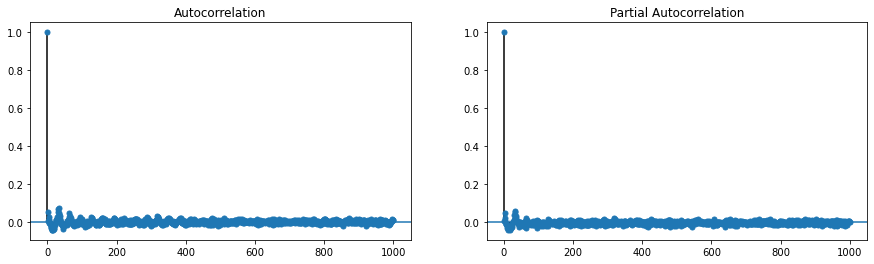

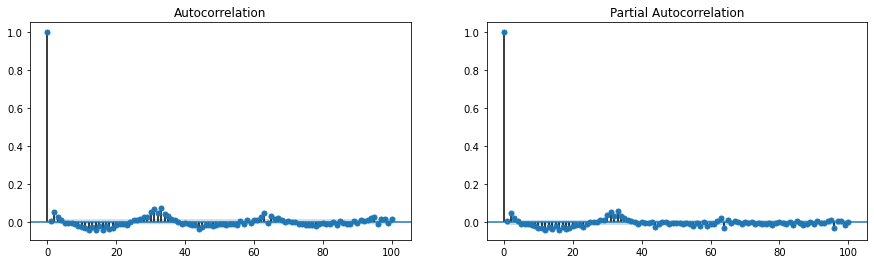

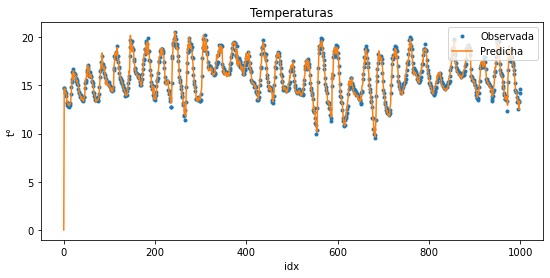

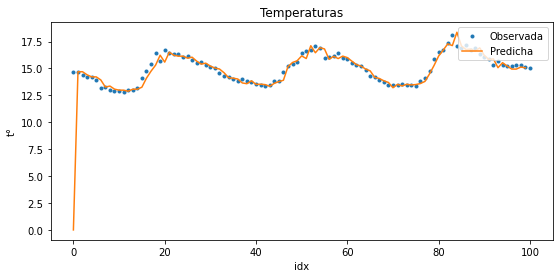

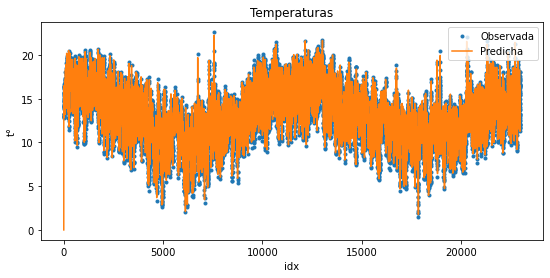

In [25]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo))

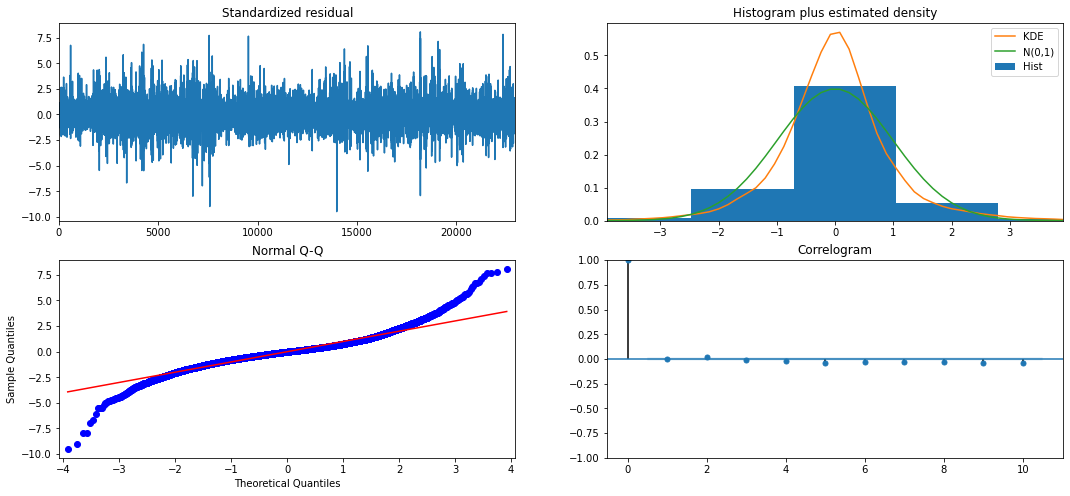

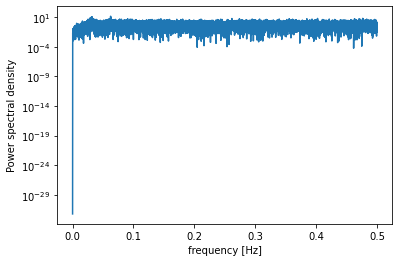

          freq        pow      delay
1436  0.062492  14.796325  16.002089
1438  0.062579  13.763803  15.979833
736   0.032029  12.100816  31.221467
712   0.030985  11.249407  32.273876
1439  0.062622   8.734175  15.968728
666   0.028983   7.928331  34.503003
705   0.030680   7.423842  32.594326
728   0.031681   7.369723  31.564560
721   0.031376   7.193393  31.871012
1430  0.062231   6.513022  16.069231
                                        SARIMAX Results                                        
Dep. Variable:                                      ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(2, 0, [1, 2], 16)   Log Likelihood              -21056.030
Date:                                 Thu, 06 Aug 2020   AIC                          42126.059
Time:                                         21:27:26   BIC                          42182.355
Sample:                                              0   HQIC                         42144.354
                 

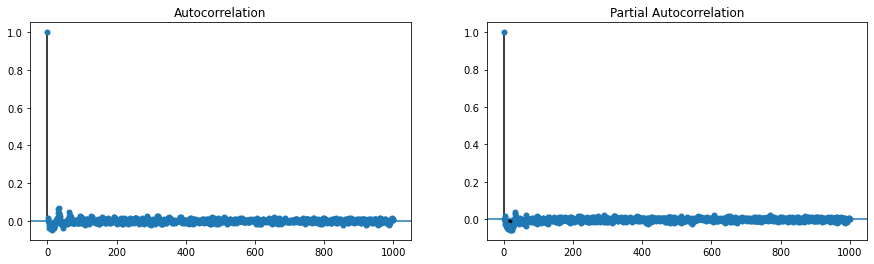

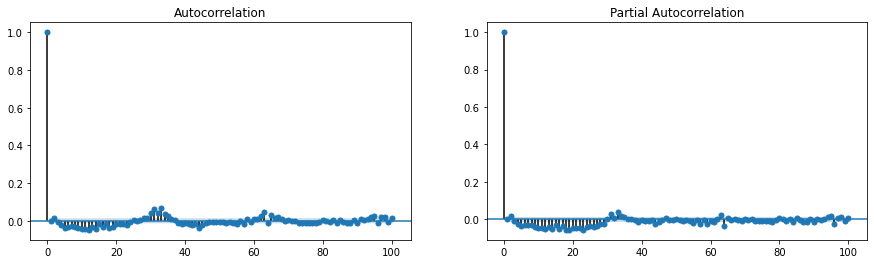

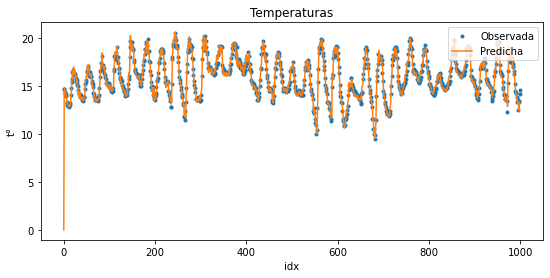

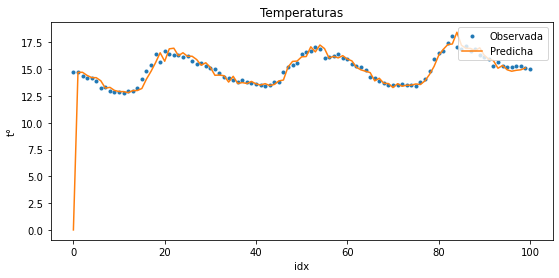

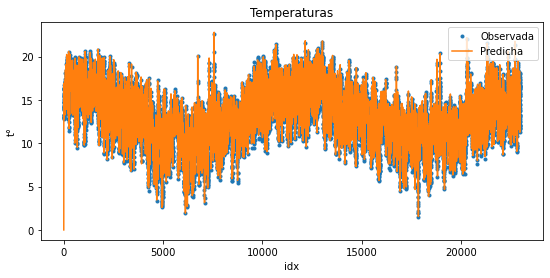

In [26]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(2,0,2,60*12/Intervalo))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


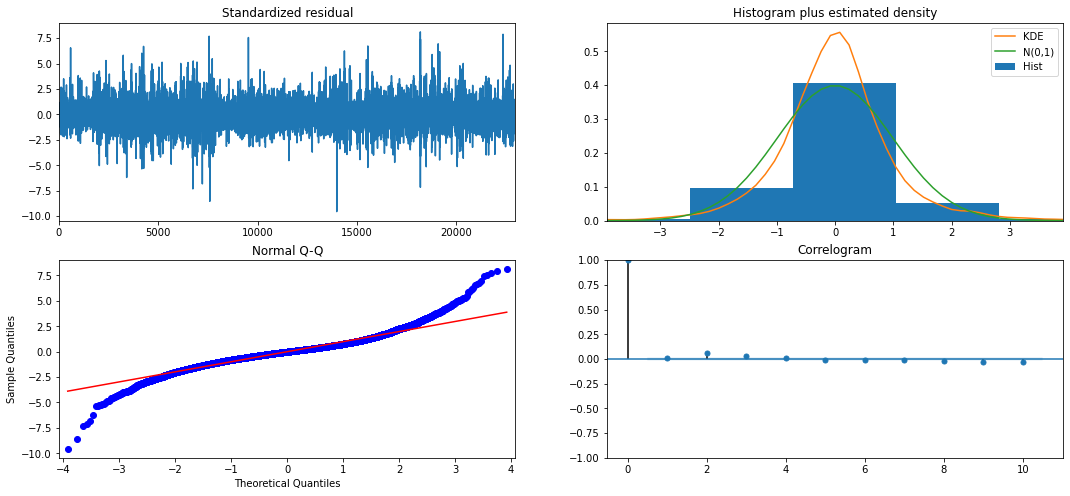

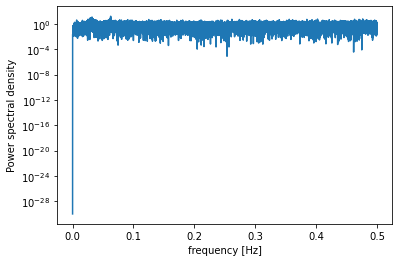

          freq        pow      delay
1438  0.062579  17.050922  15.979833
736   0.032029  12.562036  31.221467
1439  0.062622  12.068348  15.968728
712   0.030985  10.703315  32.273876
1436  0.062492   9.882435  16.002089
1430  0.062231   9.495547  16.069231
666   0.028983   9.343717  34.503003
1432  0.062318   8.747685  16.046788
705   0.030680   7.778212  32.594326
728   0.031681   7.206141  31.564560
                                        SARIMAX Results                                        
Dep. Variable:                                      ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 16)   Log Likelihood              -20766.388
Date:                                 Thu, 06 Aug 2020   AIC                          41548.775
Time:                                         21:38:22   BIC                          41613.114
Sample:                                              0   HQIC                         41569.684
                 

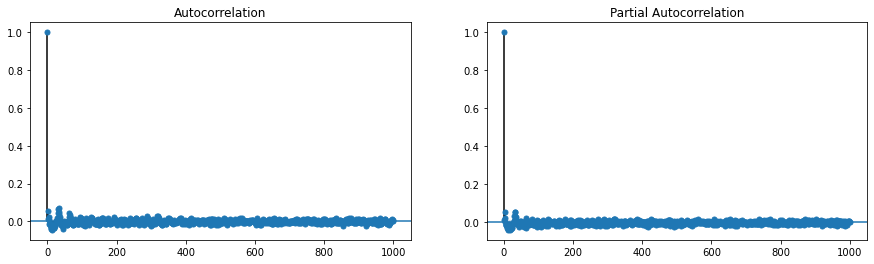

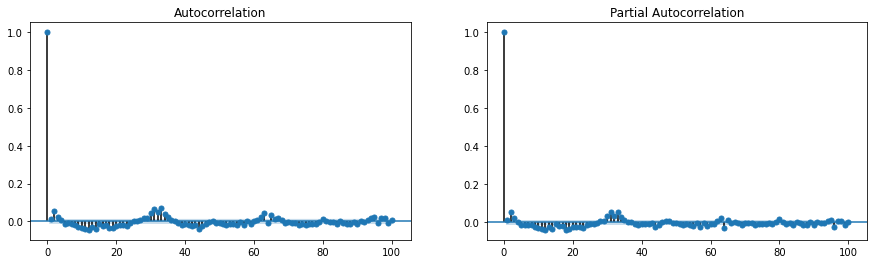

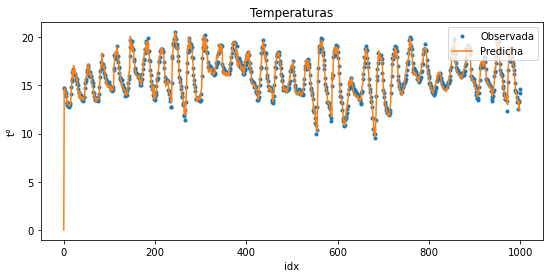

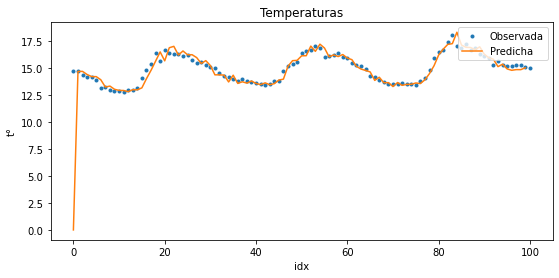

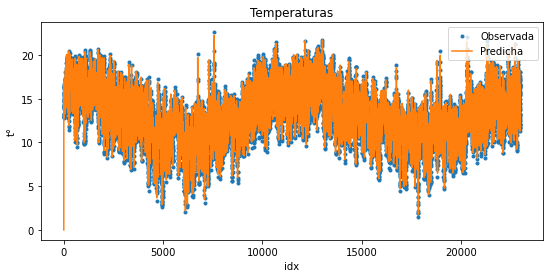

In [27]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(2,0,2,60*12/Intervalo))

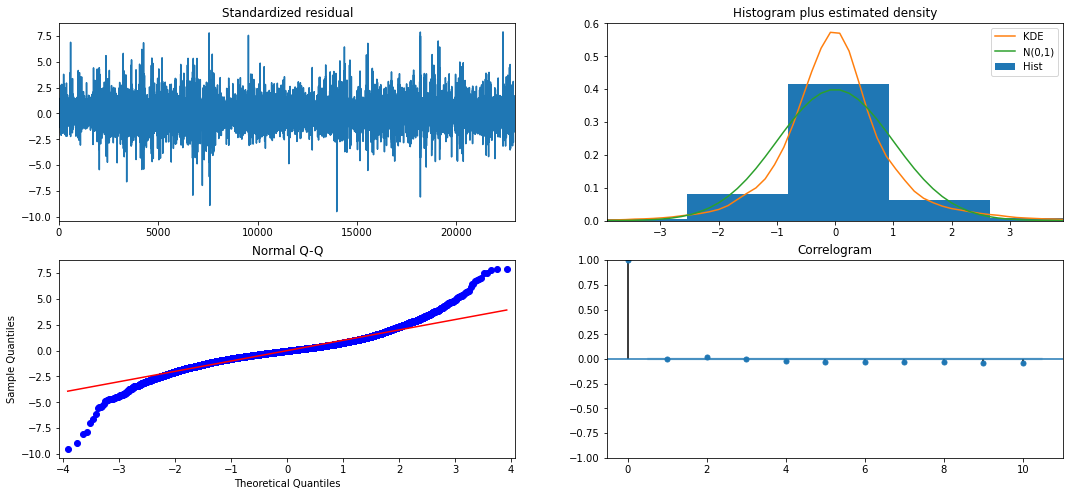

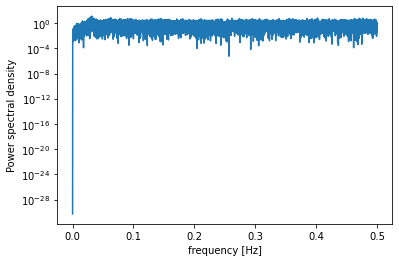

          freq        pow      delay
712   0.030985  12.308081  32.273876
736   0.032029  11.587490  31.221467
718   0.031246   9.899792  32.004178
720   0.031333   9.620012  31.915278
719   0.031289   8.805781  31.959666
666   0.028983   7.968901  34.503003
717   0.031202   7.840525  32.048815
1438  0.062579   7.660331  15.979833
716   0.031159   7.565921  32.093575
705   0.030680   7.485511  32.594326
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21040.702
Date:                              Thu, 06 Aug 2020   AIC                          42113.404
Time:                                      21:55:44   BIC                          42242.081
Sample:                                           0   HQIC                         42155.222
                                   

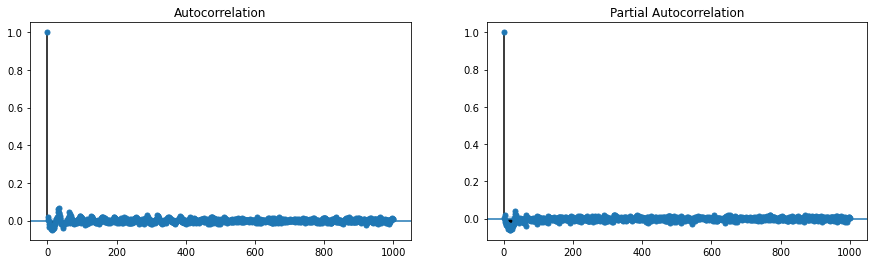

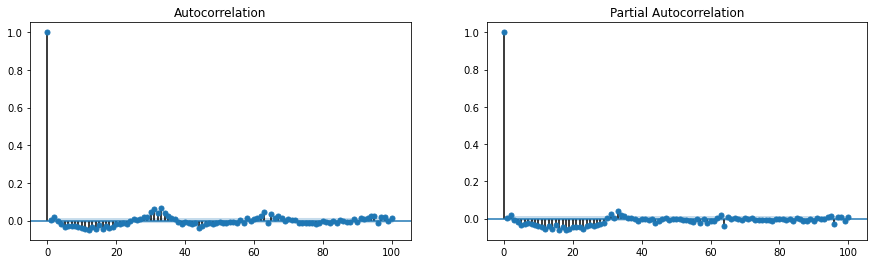

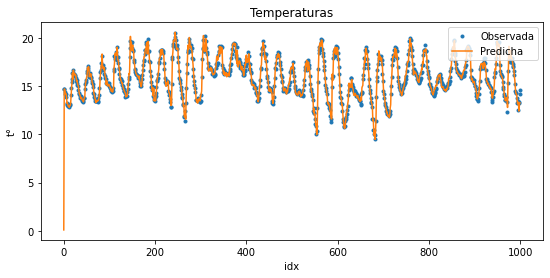

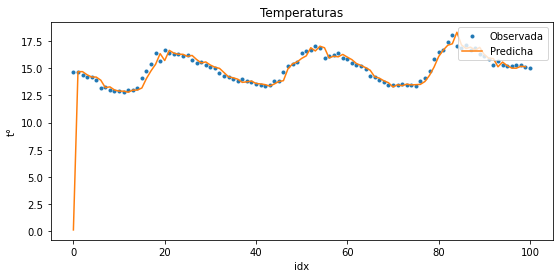

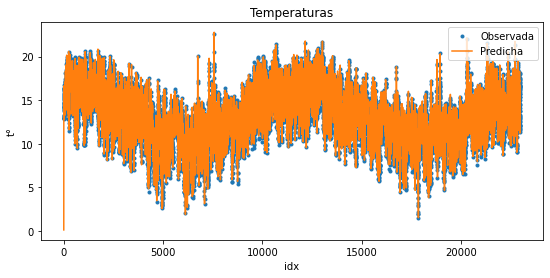

In [28]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


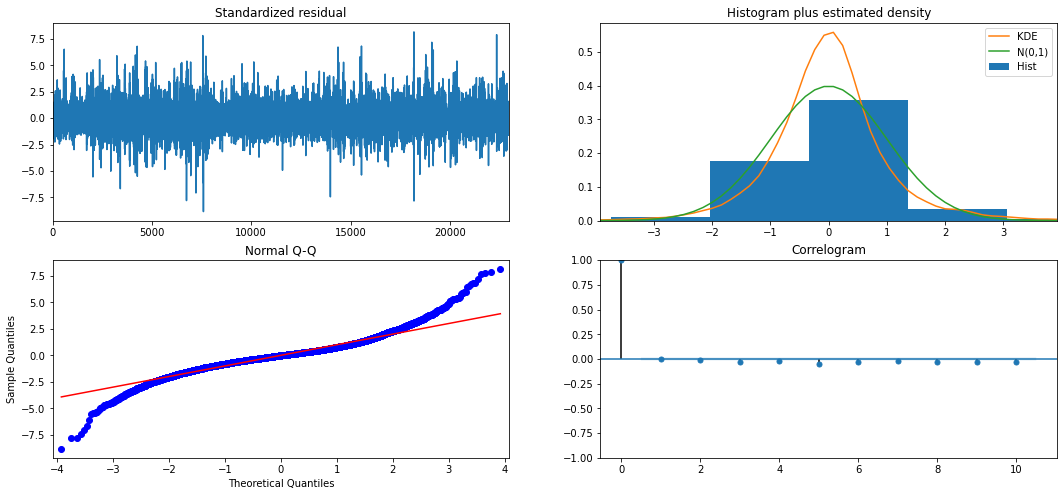

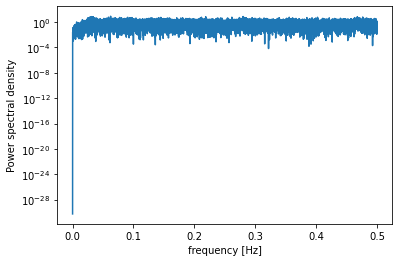

           freq       pow      delay
1436   0.062492  8.090918  16.002089
6440   0.280256  7.281717   3.568168
718    0.031246  7.053005  32.004178
5025   0.218678  6.842985   4.572935
736    0.032029  6.649901  31.221467
10750  0.467818  6.641557   2.137581
776    0.033770  6.393917  29.612113
666    0.028983  6.355999  34.503003
6438   0.280169  6.340037   3.569276
10952  0.476609  6.097432   2.098156
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                22979
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 32)   Log Likelihood              -21000.650
Date:                              Thu, 06 Aug 2020   AIC                          42057.301
Time:                                      23:31:04   BIC                          42282.485
Sample:                                           0   HQIC                         42130.482
                                   

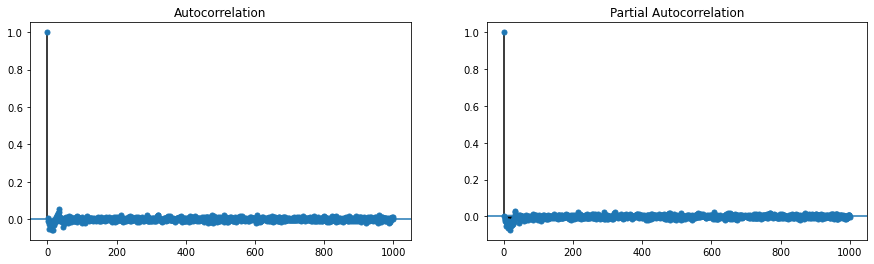

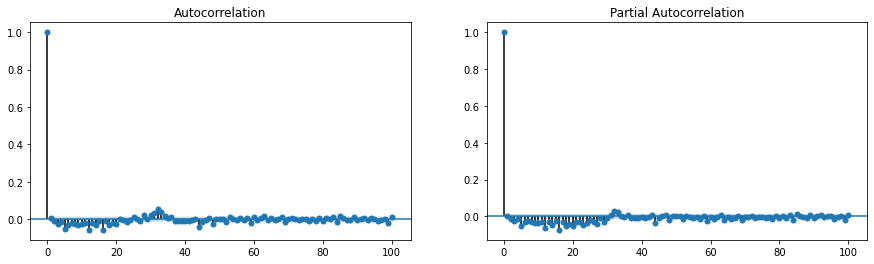

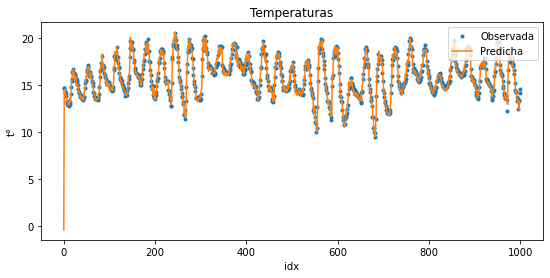

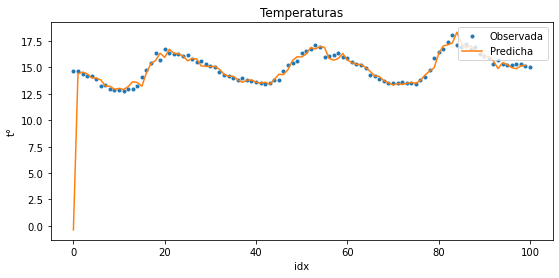

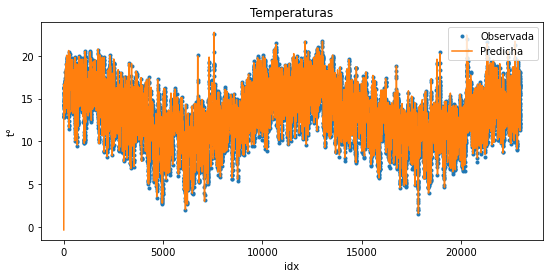

In [31]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                          'H9','H10','H11','H12','H13','H14','H15',
                          'H16','H17','H18','H19','H20','H21','H22','H23']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['rr6Horas', 'rr24Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['radiacionGlobalAcumulada24Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas', 'tMax12Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t', 'Hora_Max_t']])

In [ ]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(2,0,0,60*12/Intervalo))

In [ ]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(2,0,1,60*12/Intervalo))

In [ ]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(2,0,2,60*12/Intervalo))

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

In [ ]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo))

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                          'H9','H10','H11','H12','H13','H14','H15',
                          'H16','H17','H18','H19','H20','H21','H22','H23']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['rr6Horas', 'rr24Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['radiacionGlobalAcumulada24Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas', 'tMax12Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,1),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t', 'Hora_Max_t']])

AIC con diferentes variables:  


In [ ]:
IG.columns